<a href="https://colab.research.google.com/github/ChiNonsoHenry16/Comparative_Study_of_CNN_for_Yam_Disease_Classification/blob/main/Prediction_of_CFR_using_Synthetic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploring the concept of synthetically generating Coronary Flow Reserve (CFR). The paper is been prepared for submission to the Journal of the American College of Cardiology.

Approach:



*   Generate synthetic flow signals (e.g., using sine waves + noise to mimic physiological fluctuation).
*   Calculate CFR as their ratio.
*   Optionally, embed realistic trends (like slightly higher flow under stress).

The concepts of using Hyperemic Flow and Resting Flow can be seen in this paper

Hyun Sung Joh. Prognostic Impact of Coronary Flow Reserve in Patients With Reduced Left Ventricular Ejection Fraction. Journal of the American Heart Association
Volume 11, Number 15
https://doi.org/10.1161/JAHA.122.02584

NOTE THAT: Normal CFR: A value of 2.0-5.0 indicates adequate blood flow reserve. https://www.apollohospitals.com/diagnostics-investigations/coronary-flow-reserve

CFR = (Hyperemic Flow) / (Resting Flow).
This can be mimicked by generating time-series that resemble MRI/PET flow measurements under rest and stress conditions.

   Patient_ID       CFR
0           1  1.487291
1           2  1.487071
2           3  1.496741
3           4  1.475185
4           5  1.507795


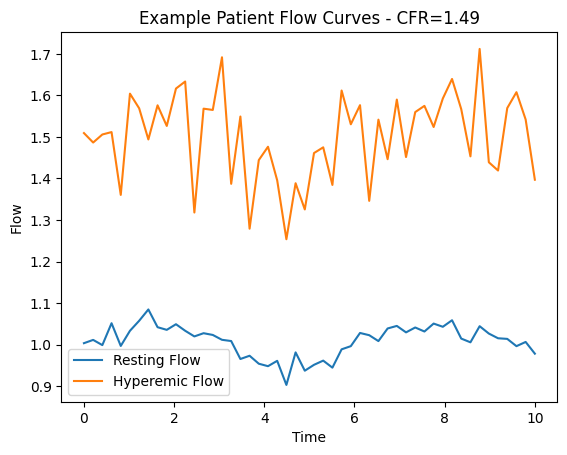

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
n_patients = 100
n_timepoints = 50

# Generate time-series for resting flow
time = np.linspace(0, 10, n_timepoints)
rest_flow = np.array([1.0 + 0.05*np.sin(time) + 0.02*np.random.randn(n_timepoints) for _ in range(n_patients)])

# Generate hyperemic flow (simulate stress flow ~ higher than rest)
hyper_flow = rest_flow + 0.5 + 0.1 * np.random.randn(n_patients, n_timepoints)

# Calculate CFR for each patient (mean hyperemic flow divided by mean resting flow)
cfr = hyper_flow.mean(axis=1) / rest_flow.mean(axis=1)

# Create DataFrame
df = pd.DataFrame({
    'Patient_ID': np.arange(1, n_patients+1),
    'CFR': cfr
})

print(df.head())

# Visualize an example patient
plt.plot(time, rest_flow[0], label='Resting Flow')
plt.plot(time, hyper_flow[0], label='Hyperemic Flow')
plt.title(f'Example Patient Flow Curves - CFR={cfr[0]:.2f}')
plt.xlabel('Time')
plt.ylabel('Flow')
plt.legend()
plt.show()

Modifying the above code to save to a downloadable CSV file

   Hypertension  Diabetes  SmokingStatus        BMI  SystolicBP  DiastolicBP  \
0             0         0              0  24.573986  124.599411    80.128286   
1             1         0              0  28.823617  119.078844    84.798270   
2             1         0              1  25.163639  135.600228    77.313542   
3             0         1              0  24.221599  134.685673    61.636402   
4             0         0              1  22.382549  147.891027    75.672261   

   FastingGlucose  TotalCholesterol         LDL        HDL  Triglycerides  \
0      129.639215        125.017829  146.342301  38.885420      91.220270   
1       94.335639        268.728277  117.638629  52.465048     105.246508   
2       88.688473        158.312826   77.562902  54.982217     179.861411   
3       90.573686        150.638038  107.843560  61.401490     102.582600   
4      114.368348        230.677113  145.939891  65.805407     173.160315   

        CFR  
0  3.688382  
1  1.636640  
2  2.727665  


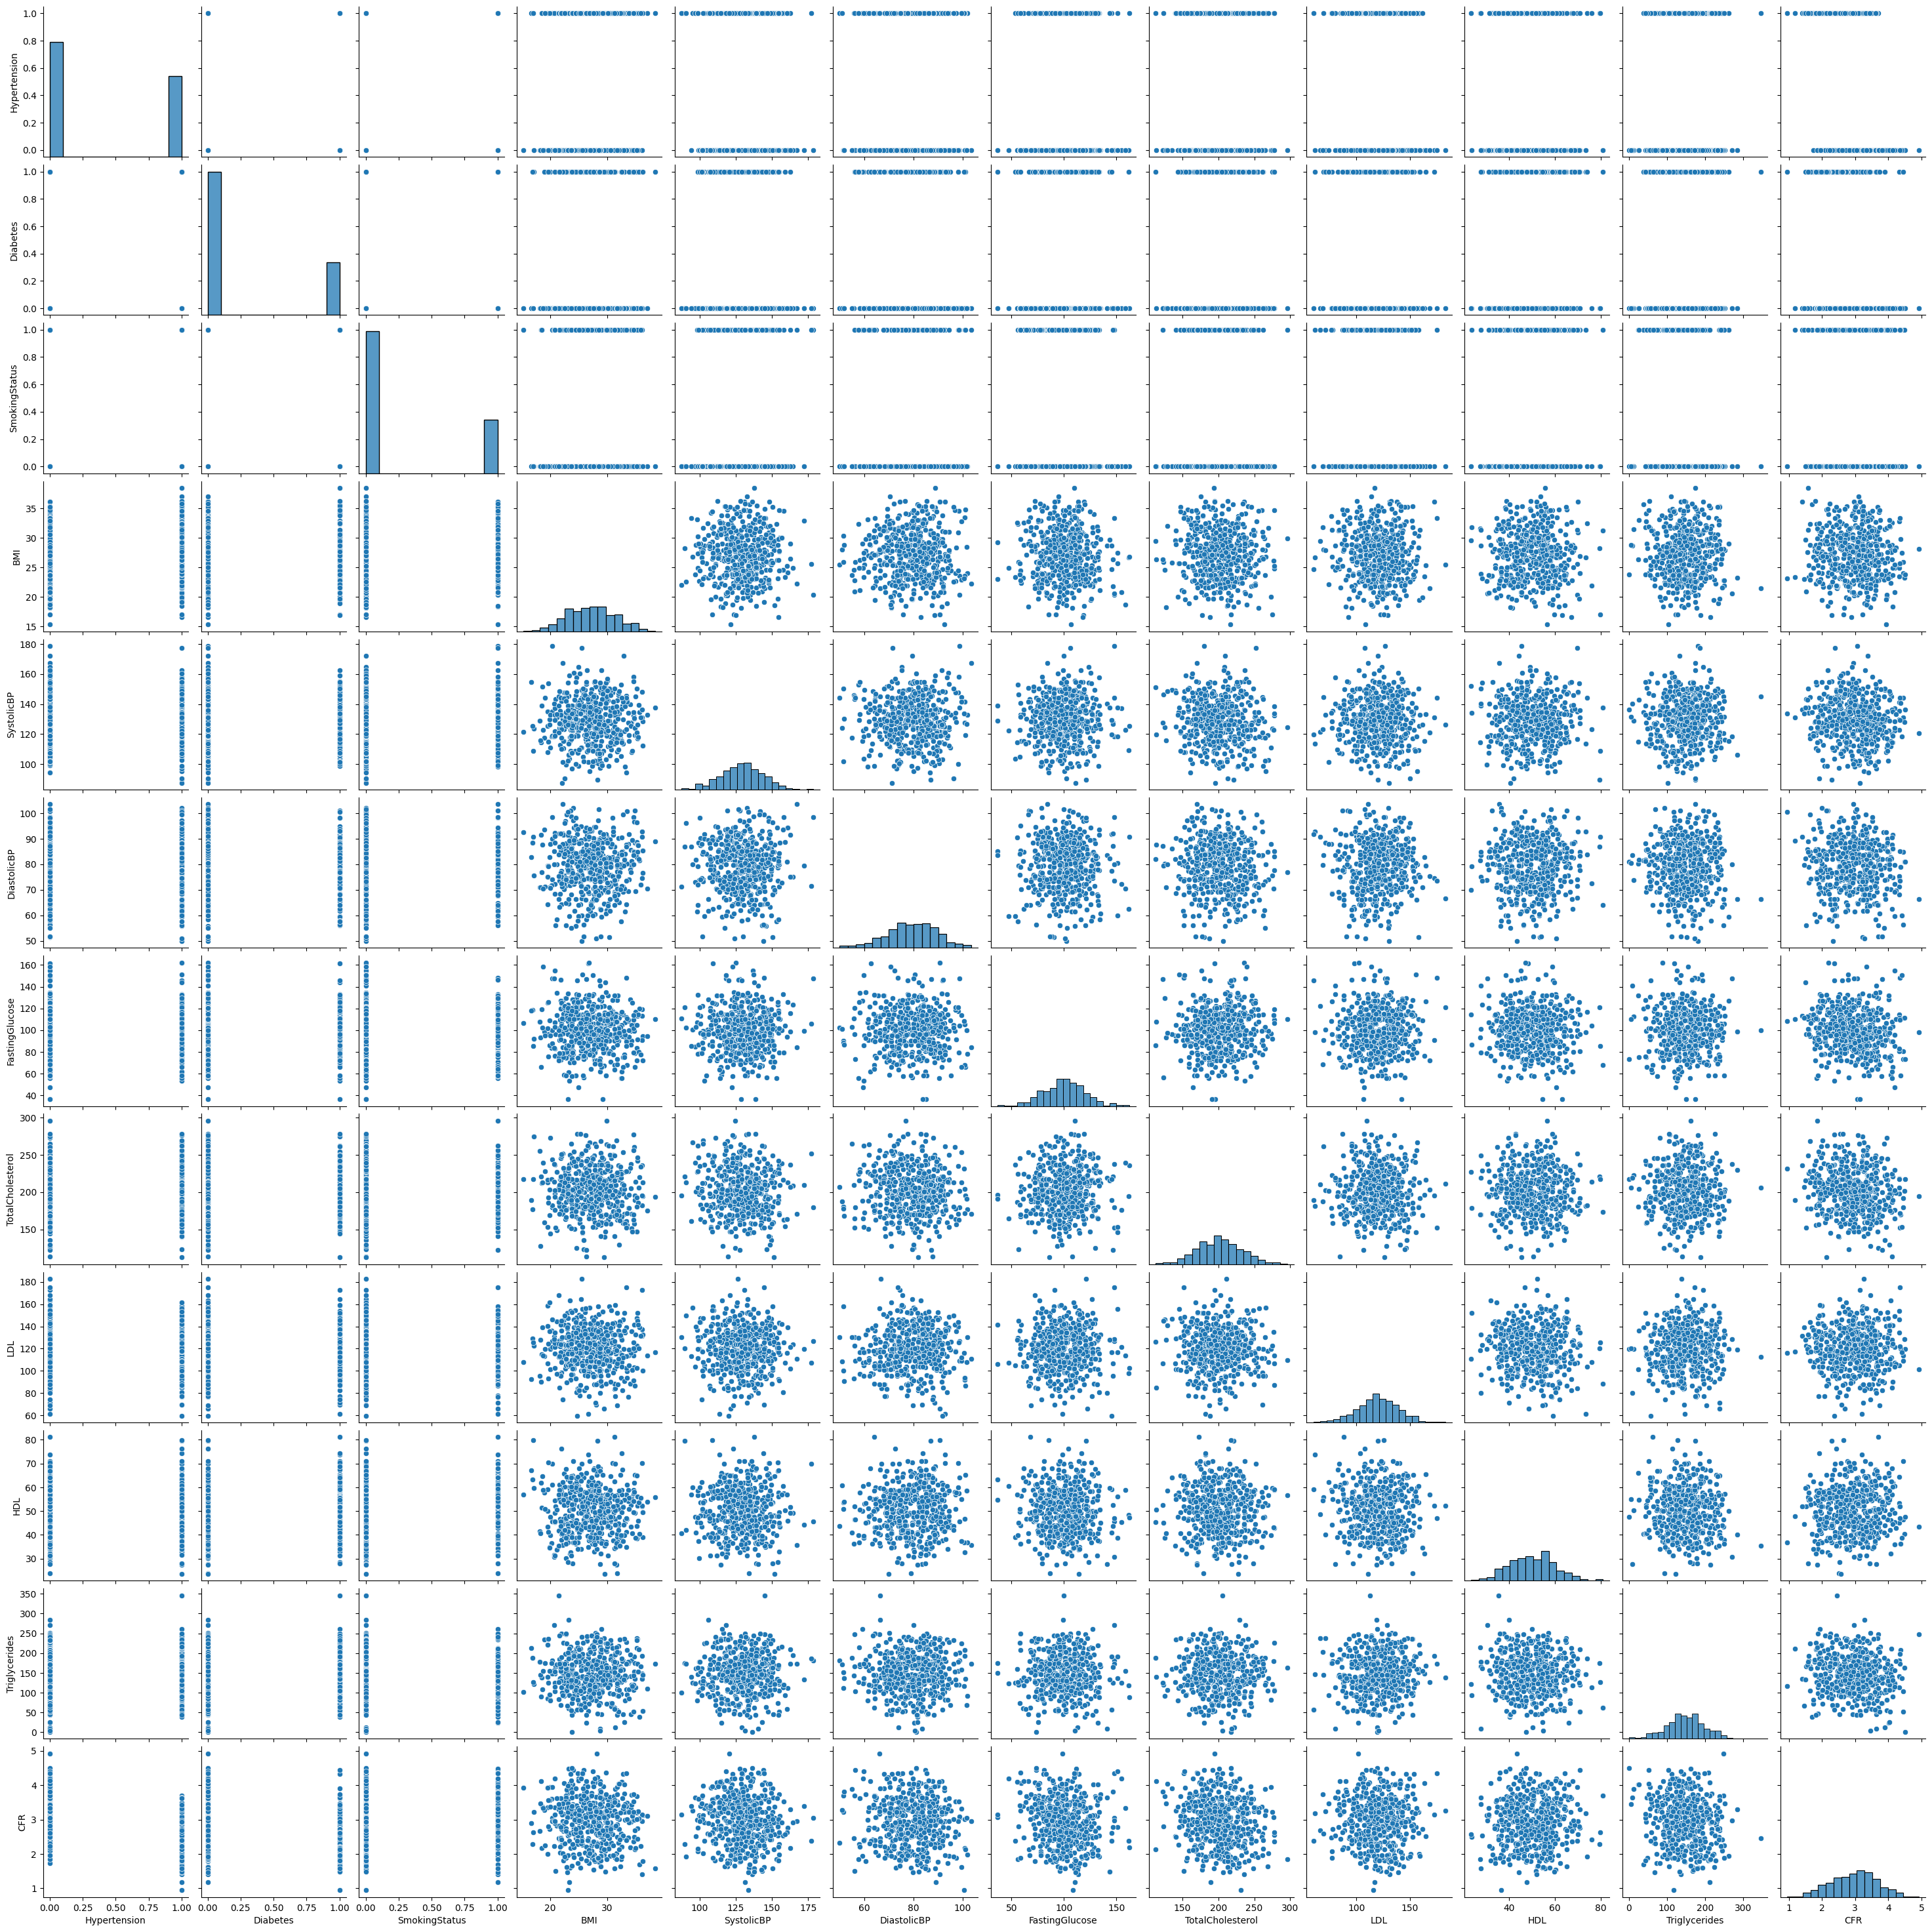

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Number of patients
n_patients = 500
np.random.seed(42)

# Existing binary risk factors
hypertension = np.random.binomial(1, 0.4, n_patients)
diabetes = np.random.binomial(1, 0.3, n_patients)

# New binary risk factor
smoking_status = np.random.binomial(1, 0.25, n_patients)  # 25% smokers

# Continuous risk factors
cholesterol_total = np.random.normal(200, 30, n_patients)   # Total cholesterol, mg/dL
ldl = np.random.normal(120, 20, n_patients)                 # LDL cholesterol, mg/dL
hdl = np.random.normal(50, 10, n_patients)                  # HDL cholesterol, mg/dL
triglycerides = np.random.normal(150, 50, n_patients)       # Triglycerides, mg/dL

bmi = np.random.normal(27, 4, n_patients)                   # BMI, kg/m^2
systolic_bp = np.random.normal(130, 15, n_patients)         # Systolic BP, mmHg
diastolic_bp = np.random.normal(80, 10, n_patients)         # Diastolic BP, mmHg

# Fasting glucose (mg/dL)
fasting_glucose = np.random.normal(100, 20, n_patients)

# Base CFR ~ normal healthy range
base_cfr = np.random.normal(3.5, 0.5, n_patients)

# Reduce CFR for risk factors (simplified coefficients)
cfr = (
    base_cfr
    - 0.7 * hypertension
    - 0.5 * diabetes
    - 0.002 * (cholesterol_total - 200)
    - 0.001 * (ldl - 120)
    + 0.002 * (hdl - 50)   # higher HDL is protective
    - 0.001 * (triglycerides - 150)
    - 0.1 * smoking_status
    - 0.01 * (bmi - 25)
    - 0.005 * (systolic_bp - 120)
    - 0.005 * (diastolic_bp - 80)
    - 0.003 * (fasting_glucose - 100)
)

# Clip CFR to realistic range
cfr = np.clip(cfr, 0.5, 5.0)

# Build dataframe
df = pd.DataFrame({
    'Hypertension': hypertension,
    'Diabetes': diabetes,
    'SmokingStatus': smoking_status,
    'BMI': bmi,
    'SystolicBP': systolic_bp,
    'DiastolicBP': diastolic_bp,
    'FastingGlucose': fasting_glucose,
    'TotalCholesterol': cholesterol_total,
    'LDL': ldl,
    'HDL': hdl,
    'Triglycerides': triglycerides,
    'CFR': cfr
})

# Print first few rows
print(df.head())

# ✅ SAVE TO CSV
df.to_csv('synthetic_cfr_dataset.csv', index=False)
print("\nDataset saved to 'synthetic_cfr_dataset.csv'")

# Optional: Visualize pairplot
sns.pairplot(df)
plt.show()


Improved code to have a mix of both good and bad persons judging ny their CFR.

In [ ]:
import numpy as np
import pandas as pd

# Settings
n_patients = 1000
np.random.seed(42)


# Binary risk factors
# ~40% hypertension
hypertension = np.random.binomial(1, 0.4, n_patients)
# ~30% diabetes
diabetes = np.random.binomial(1, 0.3, n_patients)
# ~25% smokers
smoking_status = np.random.binomial(1, 0.25, n_patients)


# Continuous risk factors
cholesterol_total = np.random.normal(200, 30, n_patients)
ldl = np.random.normal(120, 20, n_patients)
hdl = np.random.normal(50, 10, n_patients)
triglycerides = np.random.normal(150, 50, n_patients)

bmi = np.random.normal(27, 4, n_patients)
systolic_bp = np.random.normal(130, 15, n_patients)
diastolic_bp = np.random.normal(80, 10, n_patients)
fasting_glucose = np.random.normal(100, 20, n_patients)

# 4. Risk score drives CFR
# Healthy base CFR
base_cfr = np.random.normal(3.5, 0.5, n_patients)

# Risk factors reduce CFR more strongly to ensure enough low values
cfr = (
    base_cfr
    - 1.0 * hypertension
    - 0.8 * diabetes
    - 0.002 * (cholesterol_total - 200)
    - 0.001 * (ldl - 120)
    + 0.002 * (hdl - 50)
    - 0.001 * (triglycerides - 150)
    - 0.2 * smoking_status
    - 0.02 * (bmi - 25)
    - 0.01 * (systolic_bp - 120)
    - 0.01 * (diastolic_bp - 80)
    - 0.005 * (fasting_glucose - 100)
)

# Force some extra unhealthy patients to ensure a good mix:
unhealthy_indices = np.random.choice(n_patients, size=int(0.3 * n_patients), replace=False)
cfr[unhealthy_indices] -= np.random.uniform(0.5, 1.5, size=unhealthy_indices.size)

# Clip to realistic bounds
cfr = np.clip(cfr, 0.5, 5.0)


# Label as healthy/unhealthy
# Simple rule:
# CFR > 2.5 → Healthy
# CFR ≤ 2.5 → Unhealthy
health_status = np.where(cfr > 2.5, "Healthy", "Unhealthy")

# Build dataframe

df = pd.DataFrame({
    'Hypertension': hypertension,
    'Diabetes': diabetes,
    'SmokingStatus': smoking_status,
    'BMI': bmi,
    'SystolicBP': systolic_bp,
    'DiastolicBP': diastolic_bp,
    'FastingGlucose': fasting_glucose,
    'TotalCholesterol': cholesterol_total,
    'LDL': ldl,
    'HDL': hdl,
    'Triglycerides': triglycerides,
    'CFR': cfr,
    'HealthStatus': health_status
})

# Save to CSV
df.to_csv('cfr_simulation_with_health_labels.csv', index=False)

print(df.head(10))


   Hypertension  Diabetes  SmokingStatus        BMI  SystolicBP  DiastolicBP  \
0             0         0              0  38.119854  116.267845    64.927742   
1             1         0              0  22.848035  131.896888    74.432821   
2             1         1              1  21.584981  122.456969    84.287613   
3             0         1              0  29.937907  147.682989    87.704636   
4             0         1              0  18.691521  149.667434   101.934496   
5             0         0              1  26.058904  142.961050    89.557040   
6             0         0              0  35.583300  134.592018    79.432114   
7             1         1              1  20.820256  126.534107    71.095642   
8             1         0              0  19.072142  112.121879    74.357101   
9             1         0              0  21.003275  159.152933    74.072972   

   FastingGlucose  TotalCholesterol         LDL        HDL  Triglycerides  \
0      106.495632        231.798092  109.6

Use ydata-profiling tool for exploratory data analysis. Note that the result of running the ydata_profiling was removed because it prevents saving to GitHub.

However, I added the result as an image after the code bar.

In [ ]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

# Load the CSV file from the /content/ directory
df = pd.read_csv('/content/cfr_simulation_with_health_labels.csv')

# Display the first few rows of the DataFrame
#print(df.head())

# Generate the profiling report
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True, minimal=True) # Use minimal=True to reduce the complexity of the report

# Display the report in the notebook
profile.to_notebook_iframe()

# Save the report as an HTML file
profile.to_file("/content/profiling_report.html")

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=3b50f93563e65386173e6323fe4227b3a98282fbfd25f634edb7f8786107cae0
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:00<00:00, 100.73it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

These are continuous/numeric features. It's normal for real measurements (e.g., BMI, BP) to have lots of distinct values — they should be unique!

Should you worry? No! This is not a problem. It just means they are continuous — not categorical — so they’re fine for numerical models. No transformation needed just because of uniqueness.

However, there is need to check for outliers.

Checking the impact of differnt types of outliers on the dataset

In [ ]:
import pandas as pd
import numpy as np

# Example: Load your dataset
df = pd.read_csv("cfr_simulation_with_health_labels.csv")

# Pick numeric features only (exclude binary columns)
numeric_cols = ['BMI', 'SystolicBP', 'DiastolicBP', 'FastingGlucose',
                'TotalCholesterol', 'LDL', 'HDL', 'Triglycerides', 'CFR']

# --- IQR method ---
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers

print("\n[ IQR OUTLIERS ]")
for col in numeric_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")

# --- Z-Score method ---
from scipy.stats import zscore

print("\n[ Z-SCORE OUTLIERS ]")
z_scores = np.abs(zscore(df[numeric_cols]))
threshold = 3  # common rule: z > 3 is outlier
outlier_mask = (z_scores > threshold)
outlier_counts = outlier_mask.sum(axis=0)

for col, count in zip(numeric_cols, outlier_counts):
    print(f"{col}: {count} outliers")



[ IQR OUTLIERS ]
BMI: 6 outliers
SystolicBP: 9 outliers
DiastolicBP: 3 outliers
FastingGlucose: 6 outliers
TotalCholesterol: 7 outliers
LDL: 8 outliers
HDL: 10 outliers
Triglycerides: 9 outliers
CFR: 0 outliers

[ Z-SCORE OUTLIERS ]
BMI: 2 outliers
SystolicBP: 6 outliers
DiastolicBP: 1 outliers
FastingGlucose: 2 outliers
TotalCholesterol: 1 outliers
LDL: 2 outliers
HDL: 5 outliers
Triglycerides: 1 outliers
CFR: 0 outliers


Checking the impact of several outlier detection approaches on the dataset using accuracy. This may be better for calssification research.

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

# Load dataset
df = pd.read_csv("cfr_simulation_with_health_labels.csv")

# Columns
numeric_cols = ['BMI', 'SystolicBP', 'DiastolicBP', 'FastingGlucose',
                'TotalCholesterol', 'LDL', 'HDL', 'Triglycerides', 'CFR']

# Create binary target: Healthy (1) vs Unhealthy (0)
df['HealthStatus'] = np.where(df['CFR'] >= 2.0, 1, 0)

X = df[numeric_cols]
y = df['HealthStatus']

# KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

# Baseline: no handling
baseline = cross_val_score(model, X, y, cv=kf)
print(f"Baseline mean accuracy: {baseline.mean():.4f}")

# IQR removal
def remove_outliers_iqr(X, y):
    mask = np.ones(len(X), dtype=bool)
    for col in numeric_cols:
        Q1 = X[col].quantile(0.25)
        Q3 = X[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        mask &= (X[col] >= lower) & (X[col] <= upper)
    return X[mask], y[mask]

X_iqr, y_iqr = remove_outliers_iqr(X, y)
iqr_scores = cross_val_score(model, X_iqr, y_iqr, cv=kf)
print(f"IQR removal mean accuracy: {iqr_scores.mean():.4f}")

# Z-Score removal
def remove_outliers_zscore(X, y, threshold=3):
    z_scores = np.abs(zscore(X))
    mask = (z_scores < threshold).all(axis=1)
    return X[mask], y[mask]

X_z, y_z = remove_outliers_zscore(X, y)
z_scores = cross_val_score(model, X_z, y_z, cv=kf)
print(f"Z-Score removal mean accuracy: {z_scores.mean():.4f}")

# Winsorization (capping)
X_winsor = X.copy()
for col in numeric_cols:
    X_winsor[col] = winsorize(X[col], limits=[0.01, 0.01])

winsor_scores = cross_val_score(model, X_winsor, y, cv=kf)
print(f"Winsorization mean accuracy: {winsor_scores.mean():.4f}")

# Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
iso.fit(X)
iso_mask = iso.predict(X) == 1  # inliers = 1
X_iso, y_iso = X[iso_mask], y[iso_mask]

iso_scores = cross_val_score(model, X_iso, y_iso, cv=kf)
print(f"Isolation Forest mean accuracy: {iso_scores.mean():.4f}")


Baseline mean accuracy: 0.9980
IQR removal mean accuracy: 0.9979
Z-Score removal mean accuracy: 1.0000
Winsorization mean accuracy: 0.9980
Isolation Forest mean accuracy: 0.9979


Checking the impact of several outlier detection approaches on the dataset using Kfold cross-validations and judging performance using r squared, MSE and MAE values. This may be better for calssification research.

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

In [ ]:
# Load your dataset
df = pd.read_csv("cfr_simulation_with_health_labels.csv")

# Columns
numeric_cols = ['BMI', 'SystolicBP', 'DiastolicBP', 'FastingGlucose',
                'TotalCholesterol', 'LDL', 'HDL', 'Triglycerides']

# Predict CFR (continuous)
X = df[numeric_cols]
y = df['CFR']

# KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestRegressor(random_state=42)

# Scoring metrics
scoring = {
    'R2': 'r2',
    'MSE': make_scorer(mean_squared_error),
    'MAE': make_scorer(mean_absolute_error)
}

# Baseline: no outlier handling
baseline = cross_validate(model, X, y, cv=kf, scoring=scoring)
print(f"\n[Baseline]  R2: {baseline['test_R2'].mean():.4f}  MSE: {baseline['test_MSE'].mean():.4f}  MAE: {baseline['test_MAE'].mean():.4f}")

# IQR removal
def remove_outliers_iqr(X, y):
    mask = np.ones(len(X), dtype=bool)
    for col in numeric_cols:
        Q1 = X[col].quantile(0.25)
        Q3 = X[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        mask &= (X[col] >= lower) & (X[col] <= upper)
    return X[mask], y[mask]

X_iqr, y_iqr = remove_outliers_iqr(X, y)
iqr_scores = cross_validate(model, X_iqr, y_iqr, cv=kf, scoring=scoring)
print(f"[IQR Removal]  R2: {iqr_scores['test_R2'].mean():.4f}  MSE: {iqr_scores['test_MSE'].mean():.4f}  MAE: {iqr_scores['test_MAE'].mean():.4f}")

# Z-Score removal
def remove_outliers_zscore(X, y, threshold=3):
    z_scores = np.abs(zscore(X))
    mask = (z_scores < threshold).all(axis=1)
    return X[mask], y[mask]

X_z, y_z = remove_outliers_zscore(X, y)
z_scores = cross_validate(model, X_z, y_z, cv=kf, scoring=scoring)
print(f"[Z-Score Removal]  R2: {z_scores['test_R2'].mean():.4f}  MSE: {z_scores['test_MSE'].mean():.4f}  MAE: {z_scores['test_MAE'].mean():.4f}")

# Winsorization (capping)
X_winsor = X.copy()
for col in numeric_cols:
    X_winsor[col] = winsorize(X[col], limits=[0.01, 0.01])

winsor_scores = cross_validate(model, X_winsor, y, cv=kf, scoring=scoring)
print(f"[Winsorization]  R2: {winsor_scores['test_R2'].mean():.4f}  MSE: {winsor_scores['test_MSE'].mean():.4f}  MAE: {winsor_scores['test_MAE'].mean():.4f}")

# Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
iso.fit(X)
iso_mask = iso.predict(X) == 1  # inliers = 1
X_iso, y_iso = X[iso_mask], y[iso_mask]

iso_scores = cross_validate(model, X_iso, y_iso, cv=kf, scoring=scoring)
print(f"[Isolation Forest]  R2: {iso_scores['test_R2'].mean():.4f}  MSE: {iso_scores['test_MSE'].mean():.4f}  MAE: {iso_scores['test_MAE'].mean():.4f}")



[Baseline]  R2: -0.0323  MSE: 0.8919  MAE: 0.7797
[IQR Removal]  R2: -0.0561  MSE: 0.9280  MAE: 0.7961
[Z-Score Removal]  R2: -0.0286  MSE: 0.8962  MAE: 0.7801
[Winsorization]  R2: -0.0325  MSE: 0.8924  MAE: 0.7784
[Isolation Forest]  R2: -0.0523  MSE: 0.9151  MAE: 0.7907


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold # Import KFold
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load your dataset if not already loaded in this session
try:
    df # Check if df exists
except NameError:
    df = pd.read_csv("cfr_simulation_with_health_labels.csv")

# Columns
numeric_cols = ['BMI', 'SystolicBP', 'DiastolicBP', 'FastingGlucose',
                'TotalCholesterol', 'LDL', 'HDL', 'Triglycerides']

# Predict CFR (continuous)
X = df[numeric_cols]
y = df['CFR']

# Define KFold here
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the model here
model = RandomForestRegressor(random_state=42)

# Define the outlier removal function here
def remove_outliers_iqr(X, y):
    mask = np.ones(len(X), dtype=bool)
    # Access numeric_cols from the surrounding scope or pass it as an argument
    # Using surrounding scope for simplicity as it's defined just above
    for col in numeric_cols:
        Q1 = X[col].quantile(0.25)
        Q3 = X[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        mask &= (X[col] >= lower) & (X[col] <= upper)
    return X[mask], y[mask]


r2_list = []
mse_list = []
mae_list = []

for train_idx, test_idx in kf.split(X):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

    # Remove outliers from X_train, y_train only
    X_train_filtered, y_train_filtered = remove_outliers_iqr(X_train, y_train)

    # Train model on filtered training data
    model.fit(X_train_filtered, y_train_filtered)

    # Predict on original test set (no filtering)
    y_pred = model.predict(X_test)

    # Evaluate metrics
    r2_list.append(r2_score(y_test, y_pred))
    mse_list.append(mean_squared_error(y_test, y_pred))
    mae_list.append(mean_absolute_error(y_test, y_pred))

print(f"IQR Removal CV R2: {np.mean(r2_list):.4f}")
print(f"IQR Removal CV MSE: {np.mean(mse_list):.4f}")
print(f"IQR Removal CV MAE: {np.mean(mae_list):.4f}")

IQR Removal CV R2: -0.0271
IQR Removal CV MSE: 0.8864
IQR Removal CV MAE: 0.7771


In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import KFold, cross_validate # Import necessary modules
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error # Import necessary metrics
import pandas as pd # Import pandas
import numpy as np # Import numpy

# Re-define necessary variables from previous cells
# Load dataset (assuming the file exists)
try:
    df # Check if df exists
except NameError:
    df = pd.read_csv("cfr_simulation_with_health_labels.csv")

# Columns
numeric_cols = ['BMI', 'SystolicBP', 'DiastolicBP', 'FastingGlucose',
                'TotalCholesterol', 'LDL', 'HDL', 'Triglycerides']

# Predict CFR (continuous)
X = df[numeric_cols]
y = df['CFR']

# Define KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define Scoring metrics
scoring = {
    'R2': 'r2',
    'MSE': make_scorer(mean_squared_error),
    'MAE': make_scorer(mean_absolute_error)
}


dummy = DummyRegressor(strategy="mean")
scores = cross_validate(dummy, X, y, cv=kf, scoring=scoring)
print(f"Dummy Regressor CV R2: {scores['test_R2'].mean():.4f}")
print(f"Dummy Regressor CV MSE: {scores['test_MSE'].mean():.4f}")
print(f"Dummy Regressor CV MAE: {scores['test_MAE'].mean():.4f}")

Dummy Regressor CV R2: -0.0185
Dummy Regressor CV MSE: 0.8796
Dummy Regressor CV MAE: 0.7782


Appying all the models

In [ ]:
from sklearn.preprocessing import MinMaxScaler

main_features = ['BMI', 'SystolicBP', 'DiastolicBP', 'FastingGlucose',
                'TotalCholesterol', 'LDL', 'HDL', 'Triglycerides']

X = df[main_features]
y = df['CFR']

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
# TRAIN-TEST SPLIT

from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# HYPERPARAMETER TUNING: HistGradientBoostingRegressor

param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_depth': [3, 5, 7, None],
    'min_samples_leaf': [10, 20, 30],
}

hist = HistGradientBoostingRegressor(random_state=42)
hist_search = RandomizedSearchCV(hist, param_dist, n_iter=15, cv=5, scoring='r2', random_state=42)
hist_search.fit(X_train, y_train)

print("\nBest HistGB params:", hist_search.best_params_)
print("Best cross-validated R2 (HistGB):", hist_search.best_score_)
print("Validation R2 (HistGB):", hist_search.score(X_val, y_val))


Best HistGB params: {'min_samples_leaf': 20, 'max_iter': 100, 'max_depth': 7, 'learning_rate': 0.01}
Best cross-validated R2 (HistGB): -0.001678432176707556
Validation R2 (HistGB): -0.007009513753917451


In [ ]:
# XGBoost (Optional additional model)

import xgboost as xgb


xgb_param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.7, 0.8, 1.0]
}

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
xgb_search = RandomizedSearchCV(xg_reg, xgb_param_dist, n_iter=15, cv=5, scoring='r2', random_state=42)
xgb_search.fit(X_train, y_train)

print("\nBest XGBoost params:", xgb_search.best_params_)
print("Best cross-validated R2 (XGB):", xgb_search.best_score_)
print("Validation R2 (XGB):", xgb_search.score(X_val, y_val))


Best XGBoost params: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.01}
Best cross-validated R2 (XGB): -0.005404446440360977
Validation R2 (XGB): 0.02065062720495514


In [ ]:
# XGBoost (Optional additional model)

import xgboost as xgb


xgb_param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.7, 0.8, 1.0]
}

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
xgb_search = RandomizedSearchCV(xg_reg, xgb_param_dist, n_iter=15, cv=5, scoring='r2', random_state=42)
xgb_search.fit(X_train, y_train)

print("\nBest XGBoost params:", xgb_search.best_params_)
print("Best cross-validated R2 (XGB):", xgb_search.best_score_)
print("Validation R2 (XGB):", xgb_search.score(X_val, y_val))

In [ ]:
!pip install lightgbm catboost xgboost memory_profiler openpyxl


import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import xgboost as xgb
import matplotlib.pyplot as plt
import time
from memory_profiler import memory_usage
from sklearn.ensemble import (
    HistGradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor, IsolationForest
)
from sklearn.linear_model import (
    TheilSenRegressor, LinearRegression, Lasso, Ridge, ElasticNet
)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.9 MB/s eta 0:00:00



HistGradientBoosting:
  Train: R2=0.5684 RMSE=0.6281 MAE=0.5080 MAPE=33.85%
  Test : R2=-0.0700 RMSE=0.9092 MAE=0.7459 MAPE=42.27%
  Train Time: 4.902s | Peak Mem: 417.81MB

GradientBoostingRegressor:
  Train: R2=0.8427 RMSE=0.3792 MAE=0.3062 MAPE=19.99%
  Test : R2=-0.1187 RMSE=0.9297 MAE=0.7640 MAPE=44.09%
  Train Time: 1.456s | Peak Mem: 418.44MB

XGBRegressor:
  Train: R2=0.8715 RMSE=0.3427 MAE=0.2632 MAPE=17.54%
  Test : R2=-0.0503 RMSE=0.9008 MAE=0.7359 MAPE=41.45%
  Train Time: 0.848s | Peak Mem: 422.58MB
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1872
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 8
[LightGBM] [Info] Start training from score 2.335236
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



SVR:
  Train: R2=0.2676 RMSE=0.8182 MAE=0.6251 MAPE=43.17%
  Test : R2=-0.0690 RMSE=0.9088 MAE=0.7556 MAPE=42.27%
  Train Time: 0.157s | Peak Mem: 434.48MB

KNN:
  Train: R2=0.2004 RMSE=0.8549 MAE=0.7054 MAPE=45.34%
  Test : R2=-0.1384 RMSE=0.9379 MAE=0.7707 MAPE=42.87%
  Train Time: 0.050s | Peak Mem: 434.88MB

LinearRegression:
  Train: R2=0.0598 RMSE=0.9270 MAE=0.7754 MAPE=51.58%
  Test : R2=0.0493 RMSE=0.8571 MAE=0.7067 MAPE=41.42%
  Train Time: 0.009s | Peak Mem: 435.87MB

Lasso:
  Train: R2=0.0379 RMSE=0.9377 MAE=0.7829 MAPE=52.47%
  Test : R2=0.0261 RMSE=0.8674 MAE=0.7195 MAPE=42.36%
  Train Time: 0.009s | Peak Mem: 435.99MB

Ridge:
  Train: R2=0.0595 RMSE=0.9271 MAE=0.7753 MAPE=51.63%
  Test : R2=0.0496 RMSE=0.8569 MAE=0.7075 MAPE=41.50%
  Train Time: 0.011s | Peak Mem: 436.35MB

ElasticNet:
  Train: R2=0.0467 RMSE=0.9334 MAE=0.7792 MAPE=52.17%
  Test : R2=0.0338 RMSE=0.8640 MAE=0.7153 MAPE=42.13%
  Train Time: 0.010s | Peak Mem: 436.35MB

TheilSenRegressor:
  Train: R2=0.0567

<ipython-input-8-1113410687>:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  summary_df[to_round] = summary_df[to_round].applymap(lambda x: round(x, 3))


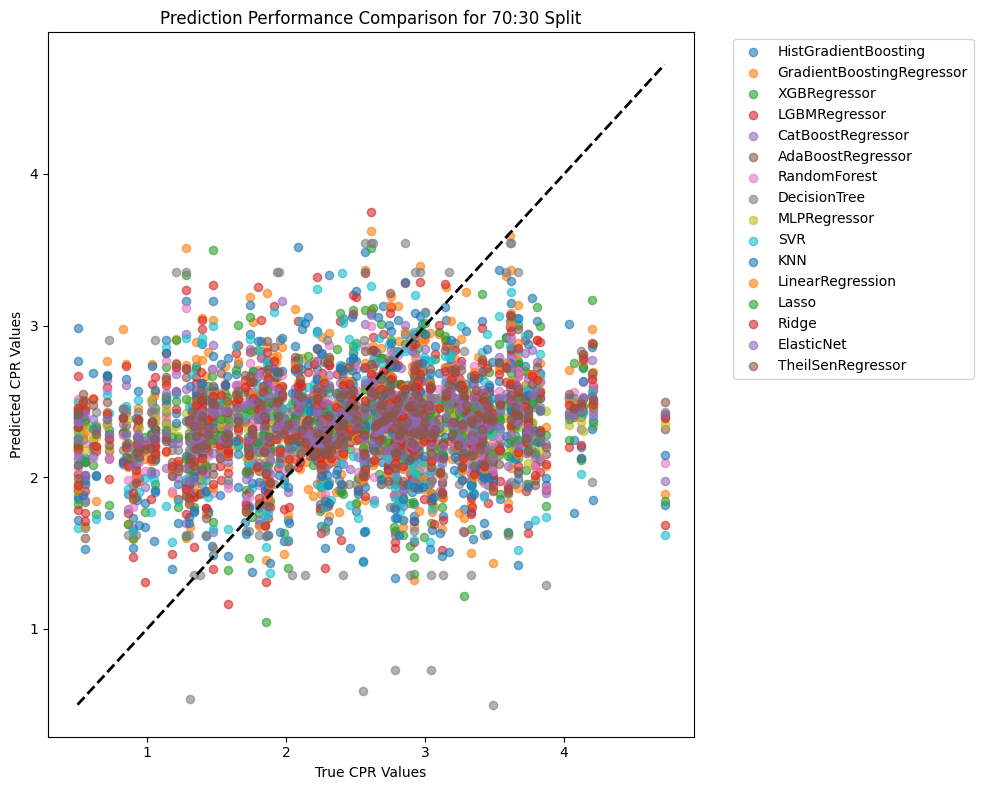

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

#  METRICS

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-7, np.inf))) * 100

def get_all_metrics(y_true, y_pred):
    return {
        'R2': r2_score(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred)
    }

def train_and_profile(model, X_train, y_train):
    """
    Trains a model, measuring time and memory.
    Returns trained model, training time (sec), and peak memory usage (MB).
    """
    train_time, mem_peak = None, None
    def fit_model():
        nonlocal train_time
        start = time.time()
        model.fit(X_train, y_train)
        train_time = time.time() - start
        return model
    mem_usage = memory_usage(fit_model, max_usage=True, retval=True)
    mem_peak = mem_usage[0]  # MB
    return model, train_time, mem_peak

def get_metrics_with_resource(model, X_train, y_train, X_val, y_val, name, resource_dict):
    model, train_time, mem_peak = train_and_profile(model, X_train, y_train)
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    train_metrics = get_all_metrics(y_train, train_pred)
    val_metrics = get_all_metrics(y_val, val_pred)
    results[name] = {
        'Train R2': train_metrics['R2'],
        'Train MAE': train_metrics['MAE'],
        'Train RMSE': train_metrics['RMSE'],
        'Train MAPE': train_metrics['MAPE'],
        'Test R2': val_metrics['R2'],
        'Test MAE': val_metrics['MAE'],
        'Test RMSE': val_metrics['RMSE'],
        'Test MAPE': val_metrics['MAPE'],
        'Model': model,
        'Val Prediction': val_pred,
        'Train Time (sec)': train_time,
        'Peak Mem (MB)': mem_peak,
    }
    resource_dict[name] = {"Train Time (sec)": train_time, "Peak Mem (MB)": mem_peak}
    print(f"\n{name}:")
    print("  Train: R2={:.4f} RMSE={:.4f} MAE={:.4f} MAPE={:.2f}%".format(
        train_metrics['R2'], train_metrics['RMSE'], train_metrics['MAE'], train_metrics['MAPE']))
    print("  Test : R2={:.4f} RMSE={:.4f} MAE={:.4f} MAPE={:.2f}%".format(
        val_metrics['R2'], val_metrics['RMSE'], val_metrics['MAE'], val_metrics['MAPE']))
    print(f"  Train Time: {train_time:.3f}s | Peak Mem: {mem_peak:.2f}MB")

results = {}
resource_dict = {}

# ML MODELS
# HistGradientBoosting
hist_params = {'learning_rate': [0.05], 'max_iter': [100], 'max_depth': [5], 'min_samples_leaf': [10]}
histgrid = GridSearchCV(HistGradientBoostingRegressor(random_state=42), param_grid=hist_params, cv=3, n_jobs=-1, scoring='r2')
get_metrics_with_resource(histgrid, X_train, y_train, X_val, y_val, "HistGradientBoosting", resource_dict)

# Gradient Boosting Regressor (Classic) with a simple parameter grid
gbr_params = {'learning_rate': [0.1], 'n_estimators': [100], 'max_depth': [5]}
gbr_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid=gbr_params, cv=3, n_jobs=-1, scoring='r2')
get_metrics_with_resource(gbr_grid, X_train, y_train, X_val, y_val, "GradientBoostingRegressor", resource_dict)

# XGBoost
xgb_params = {'learning_rate': [0.1], 'max_depth': [5], 'n_estimators': [100], 'subsample': [0.8]}
xgbgrid = GridSearchCV(XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1), param_grid=xgb_params, cv=3, n_jobs=-1, scoring='r2')
get_metrics_with_resource(xgbgrid, X_train, y_train, X_val, y_val, "XGBRegressor", resource_dict)

# LGBM
lgbm_params = {'learning_rate': [0.1], 'max_depth': [5], 'n_estimators': [100], 'subsample': [0.8]}
lgbmgrid = GridSearchCV(LGBMRegressor(random_state=42), param_grid=lgbm_params, cv=3, n_jobs=-1, scoring='r2')
get_metrics_with_resource(lgbmgrid, X_train, y_train, X_val, y_val, "LGBMRegressor", resource_dict)

# CatBoost
cat_params = {'learning_rate': [0.1], 'depth': [5], 'iterations': [100], 'subsample': [0.8]}
catgrid = GridSearchCV(CatBoostRegressor(verbose=0, random_seed=42), param_grid=cat_params, cv=3, n_jobs=-1, scoring='r2')
get_metrics_with_resource(catgrid, X_train, y_train, X_val, y_val, "CatBoostRegressor", resource_dict)

# AdaBoost
ada_params = {'learning_rate': [0.1], 'n_estimators': [100]}
adagird = GridSearchCV(AdaBoostRegressor(random_state=42), param_grid=ada_params, cv=3, n_jobs=-1, scoring='r2')
get_metrics_with_resource(adagird, X_train, y_train, X_val, y_val, "AdaBoostRegressor", resource_dict)

# Random Forest
rf_params = {'n_estimators': [100], 'max_depth': [5]}
rfgrid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=rf_params, cv=3, n_jobs=-1, scoring='r2')
get_metrics_with_resource(rfgrid, X_train, y_train, X_val, y_val, "RandomForest", resource_dict)

# Decision Tree
dt_params = {'max_depth': [5], 'min_samples_split': [2]}
dtgrid = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid=dt_params, cv=3, n_jobs=-1, scoring='r2')
get_metrics_with_resource(dtgrid, X_train, y_train, X_val, y_val, "DecisionTree", resource_dict)

# Multilayer Perceptron (MLP)
mlp_params = {'hidden_layer_sizes': [(100,)], 'activation': ['relu'], 'solver': ['adam'], 'max_iter': [200]}
mlpgrid = GridSearchCV(MLPRegressor(random_state=42), param_grid=mlp_params, cv=3, n_jobs=-1, scoring='r2')
get_metrics_with_resource(mlpgrid, X_train, y_train, X_val, y_val, "MLPRegressor", resource_dict)

# Support Vector Machine (SVM)
svr_params = {'C': [1], 'kernel': ['rbf']}
svrgrid = GridSearchCV(SVR(), param_grid=svr_params, cv=3, n_jobs=-1, scoring='r2')
get_metrics_with_resource(svrgrid, X_train, y_train, X_val, y_val, "SVR", resource_dict)

# K Nearest Neighbors (KNN)
knn_params = {'n_neighbors': [5], 'weights': ['uniform']}
knngrid = GridSearchCV(KNeighborsRegressor(), param_grid=knn_params, cv=3, n_jobs=-1, scoring='r2')
get_metrics_with_resource(knngrid, X_train, y_train, X_val, y_val, "KNN", resource_dict)

# Linear Regression
lr = LinearRegression()
get_metrics_with_resource(lr, X_train, y_train, X_val, y_val, "LinearRegression", resource_dict)

# Lasso Regression
lasso = Lasso(alpha=0.01, random_state=42, max_iter=10000)
get_metrics_with_resource(lasso, X_train, y_train, X_val, y_val, "Lasso", resource_dict)

# Ridge Regression
ridge = Ridge(alpha=1.0, random_state=42)
get_metrics_with_resource(ridge, X_train, y_train, X_val, y_val, "Ridge", resource_dict)

# ElasticNet Regression
enet = ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000, random_state=42)
get_metrics_with_resource(enet, X_train, y_train, X_val, y_val, "ElasticNet", resource_dict)

# TheilSen Regressor
ts_reg = TheilSenRegressor(random_state=42, max_iter=100)
get_metrics_with_resource(ts_reg, X_train, y_train, X_val, y_val, "TheilSenRegressor", resource_dict)


#  SUMMARY TABLE

summary_rows = []
for name, res in results.items():
    row = res.copy()
    row['ModelName'] = name
    summary_rows.append(row)
summary_df = pd.DataFrame(summary_rows)
order = [
    'ModelName',
    'Train R2', 'Train RMSE', 'Train MAE', 'Train MAPE',
    'Test R2', 'Test RMSE', 'Test MAE', 'Test MAPE',
    'Train Time (sec)', 'Peak Mem (MB)'
]

# Round to three decimals (except model name)
summary_df = summary_df[order]
to_round = [col for col in order if col != 'ModelName']
summary_df[to_round] = summary_df[to_round].applymap(lambda x: round(x, 3))

print("\n--- Summary Table (Main Metrics + Resource Usage, rounded to 3 decimals) ---")
print(summary_df.to_string(index=False))


# DIAGRAM: SCATTERPLOT OF MODEL PREDICTIONS

plt.figure(figsize=(10,8))
for name, res in results.items():
    plt.scatter(y_val, res["Val Prediction"], label=name, alpha=0.6, s=35)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel("True CPR Values")
plt.ylabel("Predicted CPR Values")
plt.title("Prediction Performance Comparison for 70:30 Split")
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0), ncol=1)
plt.tight_layout()
plt.show()
